In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [432]:
data1 =  pd.DataFrame(pd.read_csv('C://Users//user//Documents/ALPR/loan_approval_dataset.csv'))
data1.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,96,299,12,778,24,176,227,80,Approved
1,2,0,Not Graduate,Yes,41,122,8,417,27,22,88,33,Rejected
2,3,3,Graduate,No,91,297,20,506,71,45,333,128,Rejected
3,4,3,Graduate,No,82,307,8,467,182,33,233,79,Rejected
4,5,5,Not Graduate,Yes,98,242,20,382,124,82,294,50,Rejected


In [433]:
data2 =  pd.DataFrame(pd.read_csv('C://Users//user//Documents/ALPR/train_u6lujuX_CVtuZ9i (1).csv'))
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [434]:
data3 = pd.DataFrame(pd.read_csv('C://Users//user//Documents/ALPR/Bank_Loan_Granting.csv'))
data3.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [435]:
data1 = data1.rename(columns={' no_of_dependents': 'dependents', ' income_annum': 'income', ' education': 'education', ' self_employed': 'self_employed', ' loan_amount': 'loan_amount', ' loan_term': 'loan_term', ' cibil_score': 'credit_score', ' residential_assets_value': 'residential_assets_value', ' commercial_assets_value': 'commercial_assets_value', ' luxury_assets_value': 'luxury_assets_value', ' bank_asset_value': 'bank_asset_value', ' loan_status': 'loan_status'})
data2 = data2.rename(columns={'Loan_ID': 'loan_id', 'Dependents': 'dependents', 'Education': 'education', 'Self_Employed':'self_employed', 'ApplicantIncome': 'income', 'LoanAmount': 'loan_amount', 'Loan_Amount_Term': 'loan_term', 'Credit_History': 'credit_history', 'Property_Area': 'property_area', 'Loan_Status': 'loan_status'})
data3 = data3.rename(columns={'ID': 'loan_id', 'Family': 'dependents', 'Education': 'education', 'Experience': 'self_employed', 'Income': 'income', 'Mortgage': 'mortgage', 'Personal Loan': 'loan_status'})

In [436]:
data1.replace({'education': {' Graduate': 1, ' Not Graduate': 0}, 'self_employed': {' Yes': 1, ' No': 0}, 'loan_status': {' Approved': 1, ' Rejected': 0}}, inplace=True)
data2.replace({'education': {'Graduate': 1, 'Not Graduate': 0}, 'self_employed': {'Yes': 1, 'No': 0}, 'loan_status': {'Y': 1, 'N': 0}}, inplace=True)
data3.replace({'education': {2: 1, 3: 0, 1: 0}}, inplace=True)

In [437]:
data3['self_employed'] = np.where(data3['self_employed'] > 1, 1, data3['self_employed'])
data3['self_employed'] = np.where(data3['self_employed'] < 1, 0, data3['self_employed'])

In [438]:
df = pd.concat([data1, data2, data3])
df

,loan_id,dependents,education,self_employed,income,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,...,credit_history,property_area,Age,ZIP Code,CCAvg,mortgage,Securities Account,CD Account,Online,CreditCard
0,1,2.0,1,0.0,96,299.0,12.0,778.0,24.0,176.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0,0,1.0,41,122.0,8.0,417.0,27.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3.0,1,0.0,91,297.0,20.0,506.0,71.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3.0,1,0.0,82,307.0,8.0,467.0,182.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5.0,0,1.0,98,242.0,20.0,382.0,124.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1.0,0,1.0,40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,92697.0,1/90,0.0,0.0,0.0,1.0,0.0
4996,4997,4.0,0,1.0,15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,92037.0,0/40,85.0,0.0,0.0,1.0,0.0
4997,4998,2.0,0,1.0,24,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.0,93023.0,0/30,0.0,0.0,0.0,0.0,0.0
4998,4999,3.0,1,1.0,49,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,65.0,90034.0,0/50,0.0,0.0,0.0,1.0,0.0


In [439]:
df = df.drop(['loan_id', 'Gender', 'Married', 'CoapplicantIncome', 'credit_history', 'property_area', 'Online', 'ZIP Code', 'CCAvg'], axis=1)


In [440]:
df = df.drop(['Securities Account', 'CD Account', 'CreditCard'], axis=1)

In [441]:
df_dup = df[df.duplicated()]
df_dup.shape
df.drop(df_dup.index, inplace=True)
df

,dependents,education,self_employed,income,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Age,mortgage
0,2.0,1,0.0,96,299.0,12.0,778.0,24.0,176.0,227.0,80.0,1,NaN,NaN
1,0.0,0,1.0,41,122.0,8.0,417.0,27.0,22.0,88.0,33.0,0,NaN,NaN
2,3.0,1,0.0,91,297.0,20.0,506.0,71.0,45.0,333.0,128.0,0,NaN,NaN
3,3.0,1,0.0,82,307.0,8.0,467.0,182.0,33.0,233.0,79.0,0,NaN,NaN
4,5.0,0,1.0,98,242.0,20.0,382.0,124.0,82.0,294.0,50.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0,1.0,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,29.0,0.0
4996,4.0,0,1.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,30.0,85.0
4997,2.0,0,1.0,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63.0,0.0
4998,3.0,1,1.0,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,65.0,0.0


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9459 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dependents                9444 non-null   float64
 1   education                 9459 non-null   int64  
 2   self_employed             9427 non-null   float64
 3   income                    9459 non-null   int64  
 4   loan_amount               4682 non-null   float64
 5   loan_term                 4690 non-null   float64
 6   credit_score              4095 non-null   float64
 7   residential_assets_value  4095 non-null   float64
 8   commercial_assets_value   4095 non-null   float64
 9   luxury_assets_value       4095 non-null   float64
 10  bank_asset_value          4095 non-null   float64
 11  loan_status               9459 non-null   int64  
 12  Age                       4755 non-null   float64
 13  mortgage                  4755 non-null   float64
dtypes: float64(11

In [443]:
#checking missing values
df.isna().sum()

dependents                    15
education                      0
self_employed                 32
income                         0
loan_amount                 4777
loan_term                   4769
credit_score                5364
residential_assets_value    5364
commercial_assets_value     5364
luxury_assets_value         5364
bank_asset_value            5364
loan_status                    0
Age                         4704
mortgage                    4704
dtype: int64

In [444]:
df['dependents'] = df['dependents'].fillna(df['dependents'].mean())
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mean())
df

,dependents,education,self_employed,income,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Age,mortgage
0,2.0,1,0.0,96,299.0,12.0,778.0,24.0,176.0,227.0,80.0,1,NaN,NaN
1,0.0,0,1.0,41,122.0,8.0,417.0,27.0,22.0,88.0,33.0,0,NaN,NaN
2,3.0,1,0.0,91,297.0,20.0,506.0,71.0,45.0,333.0,128.0,0,NaN,NaN
3,3.0,1,0.0,82,307.0,8.0,467.0,182.0,33.0,233.0,79.0,0,NaN,NaN
4,5.0,0,1.0,98,242.0,20.0,382.0,124.0,82.0,294.0,50.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0,1.0,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,29.0,0.0
4996,4.0,0,1.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,30.0,85.0
4997,2.0,0,1.0,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63.0,0.0
4998,3.0,1,1.0,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,65.0,0.0


In [445]:
from statsmodels.imputation.mice import MICEData, MICE
mice_data = MICEData(df[['loan_amount', 'loan_term', 'credit_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'Age', 'mortgage']])
mice_data.update_all()
imputed_data = mice_data.data
df1 = pd.DataFrame(imputed_data, columns=['loan_amount', 'loan_term', 'credit_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'Age', 'mortgage'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9459 entries, 0 to 9458
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amount               9459 non-null   float64
 1   loan_term                 9459 non-null   float64
 2   credit_score              9459 non-null   float64
 3   residential_assets_value  9459 non-null   float64
 4   commercial_assets_value   9459 non-null   float64
 5   luxury_assets_value       9459 non-null   float64
 6   bank_asset_value          9459 non-null   float64
 7   Age                       9459 non-null   float64
 8   mortgage                  9459 non-null   float64
dtypes: float64(9)
memory usage: 665.2 KB


In [446]:
df2 = df[['dependents', 'education', 'self_employed', 'income', 'loan_status']]
df2 = df2.reset_index()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9459 entries, 0 to 9458
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          9459 non-null   int64  
 1   dependents     9459 non-null   float64
 2   education      9459 non-null   int64  
 3   self_employed  9459 non-null   float64
 4   income         9459 non-null   int64  
 5   loan_status    9459 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 443.5 KB


In [447]:
df3 = df1.join(df2)
df3.columns

Index(['loan_amount', 'loan_term', 'credit_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'Age', 'mortgage', 'index', 'dependents', 'education', 'self_employed',
       'income', 'loan_status'],
      dtype='object')

In [448]:
df3 = df3.drop(['index'], axis=1)

In [449]:
df3.duplicated().sum()

0

In [450]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9459 entries, 0 to 9458
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amount               9459 non-null   float64
 1   loan_term                 9459 non-null   float64
 2   credit_score              9459 non-null   float64
 3   residential_assets_value  9459 non-null   float64
 4   commercial_assets_value   9459 non-null   float64
 5   luxury_assets_value       9459 non-null   float64
 6   bank_asset_value          9459 non-null   float64
 7   Age                       9459 non-null   float64
 8   mortgage                  9459 non-null   float64
 9   dependents                9459 non-null   float64
 10  education                 9459 non-null   int64  
 11  self_employed             9459 non-null   float64
 12  income                    9459 non-null   int64  
 13  loan_status               9459 non-null   int64  
dtypes: float

### EDA

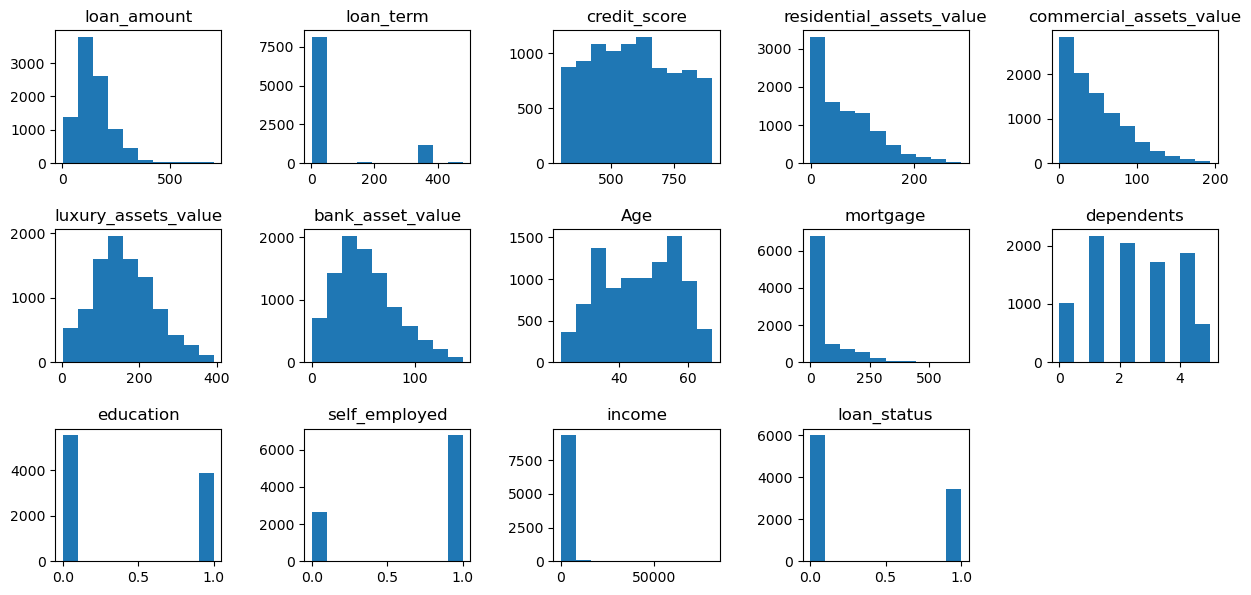

In [451]:
#histogram
hist = plt.figure(figsize=(15,25))
hist.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(len(df3.columns)):
    plt.subplot(10,5,i+1)
    plt.title(df3.columns[i])
    plt.hist(df3[df3.columns[i]])
    
plt.show()

Text(0.5, 1.0, 'loan_amount')

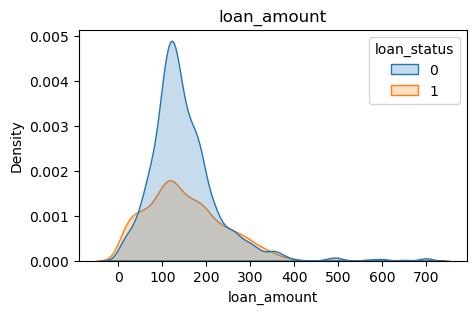

In [452]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['loan_amount'], hue='loan_status', ax=ax, fill=True)
ax.set_title('loan_amount')

Text(0.5, 1.0, 'loan_term')

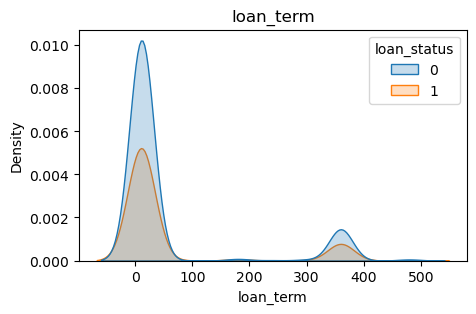

In [453]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['loan_term'], hue='loan_status', ax=ax, fill=True)
ax.set_title('loan_term')

Text(0.5, 1.0, 'credit_score')

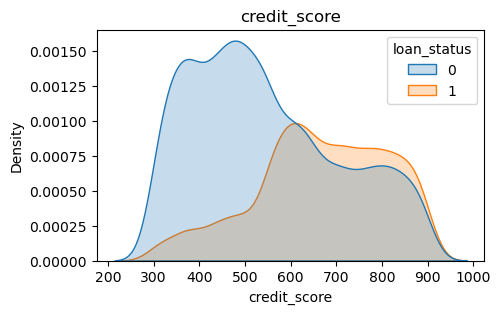

In [454]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['credit_score'], hue='loan_status', ax=ax, fill=True)
ax.set_title('credit_score')

Text(0.5, 1.0, 'residential_assets_value')

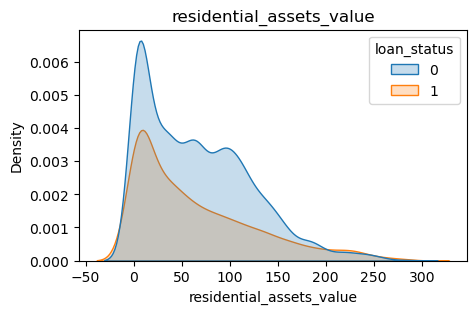

In [455]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['residential_assets_value'], hue='loan_status', ax=ax, fill=True)
ax.set_title('residential_assets_value')

Text(0.5, 1.0, 'commercial_assets_value')

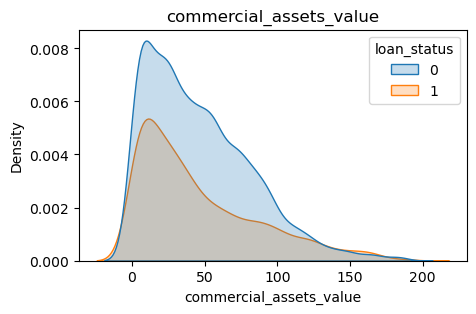

In [456]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['commercial_assets_value'], hue='loan_status', ax=ax, fill=True)
ax.set_title('commercial_assets_value')

Text(0.5, 1.0, 'luxury_assets_value')

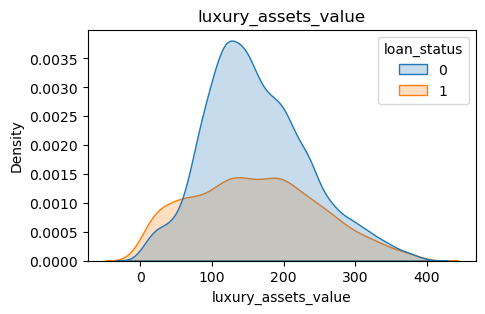

In [457]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['luxury_assets_value'], hue='loan_status', ax=ax, fill=True)
ax.set_title('luxury_assets_value')

Text(0.5, 1.0, 'bank_asset_value')

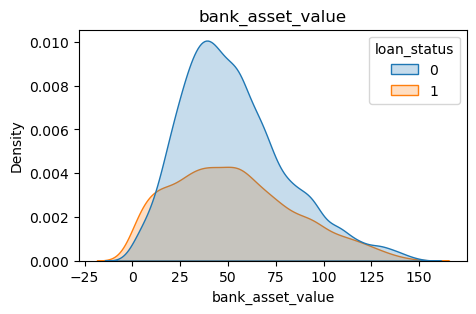

In [458]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['bank_asset_value'], hue='loan_status', ax=ax, fill=True)
ax.set_title('bank_asset_value')

Text(0.5, 1.0, 'Age')

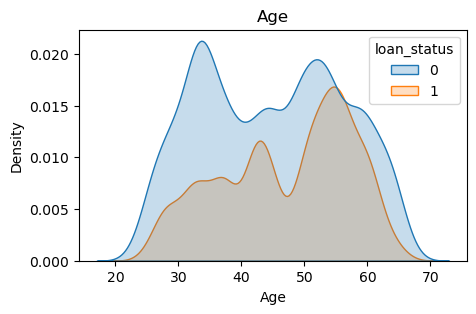

In [459]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['Age'], hue='loan_status', ax=ax, fill=True)
ax.set_title('Age')

Text(0.5, 1.0, 'mortgage')

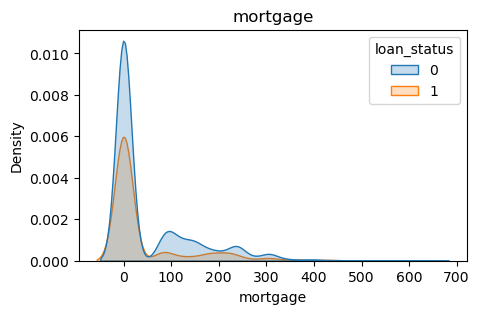

In [460]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['mortgage'], hue='loan_status', ax=ax, fill=True)
ax.set_title('mortgage')

Text(0.5, 1.0, 'dependents')

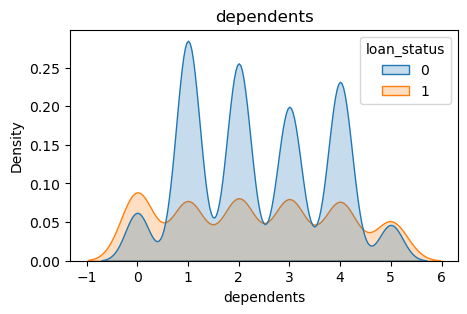

In [461]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['dependents'], hue='loan_status', ax=ax, fill=True)
ax.set_title('dependents')

Text(0.5, 1.0, 'education')

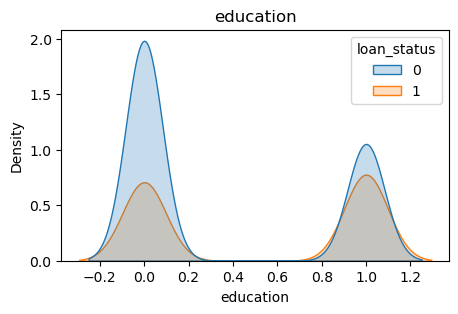

In [462]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['education'], hue='loan_status', ax=ax, fill=True)
ax.set_title('education')

Text(0.5, 1.0, 'self_employed')

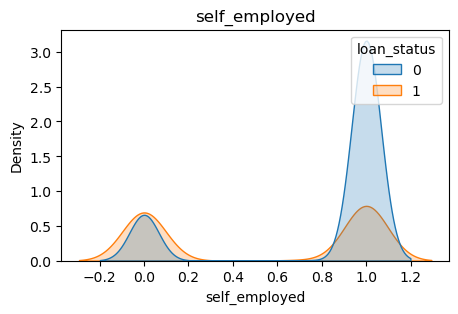

In [463]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['self_employed'], hue='loan_status', ax=ax, fill=True)
ax.set_title('self_employed')

Text(0.5, 1.0, 'income')

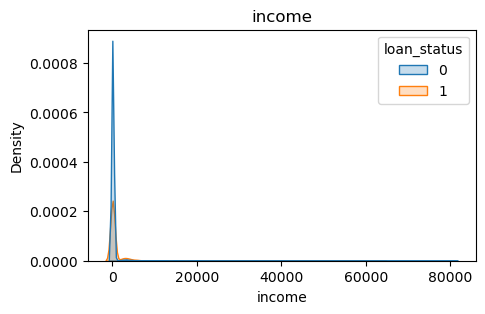

In [464]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.kdeplot(data=df3, x=df3['income'], hue='loan_status', ax=ax, fill=True)
ax.set_title('income')

### Handling outliers

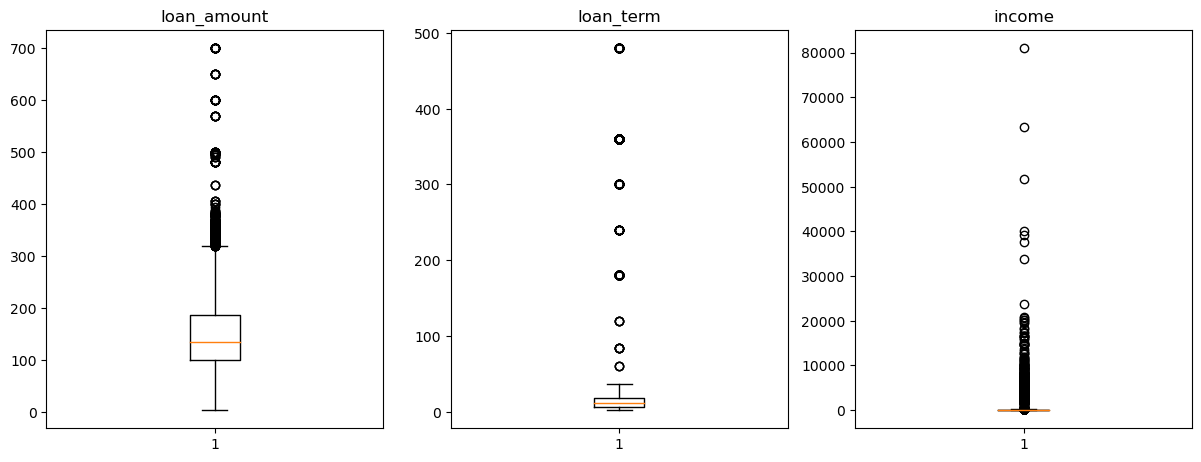

In [465]:
plt.figure(figsize=(20,30))
df_outlier = df3[['loan_amount', 'loan_term', 'income']]
for i in range(len(df_outlier.columns)):
    plt.subplot(5,4,i+1)
    plt.title(df_outlier.columns[i])
    plt.boxplot(df_outlier[df_outlier.columns[i]])
    
plt.show()

In [466]:
min_threshold,max_threshold = df3['income'].quantile([0.05,0.95])
min_threshold,max_threshold
df4 = df3[(df3['income']<max_threshold) & (df3['income']>min_threshold)]
df4.describe()
#984개 데이터 제거

,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Age,mortgage,dependents,education,self_employed,income,loan_status
count,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000
mean,155.164720,43.942655,590.904307,71.522714,49.170619,164.855457,54.044248,45.401770,51.307847,2.403540,0.384661,0.756229,100.315044,0.336873
std,80.661611,102.230065,168.464138,58.520987,38.208450,72.654934,27.824635,11.062234,95.516849,1.424436,0.486544,0.429188,272.594923,0.472669
min,9.000000,2.000000,300.000000,-1.000000,0.000000,23.000000,6.000000,23.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,104.000000,6.000000,448.000000,22.000000,19.000000,111.000000,33.000000,35.000000,0.000000,1.000000,0.000000,1.000000,38.000000,0.000000
50%,138.000000,12.000000,585.000000,61.000000,40.000000,155.000000,49.000000,45.000000,0.000000,2.000000,0.000000,1.000000,61.000000,0.000000
75%,190.000000,18.000000,730.500000,108.000000,73.000000,211.000000,70.000000,54.000000,84.000000,4.000000,1.000000,1.000000,87.000000,1.000000
max,700.000000,480.000000,900.000000,291.000000,194.000000,392.000000,147.000000,67.000000,635.000000,5.000000,1.000000,1.000000,2708.000000,1.000000


In [467]:
min_threshold,max_threshold = df4['loan_term'].quantile([0.001,0.999])
min_threshold,max_threshold
df5 = df4[(df4['loan_term']<max_threshold) & (df4['loan_term']>min_threshold)]
df5.describe()
#697개 데이터 제거

,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Age,mortgage,dependents,education,self_employed,income,loan_status
count,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.00000,7715.000000
mean,155.084122,46.525470,591.241866,70.958393,48.864809,165.473364,54.180687,45.537265,51.117952,2.405055,0.383150,0.756065,102.15930,0.330266
std,80.853814,103.393006,168.484346,58.626905,38.113571,72.948317,27.873157,11.024968,95.131352,1.424225,0.486186,0.429269,279.93743,0.470339
min,9.000000,4.000000,300.000000,-1.000000,0.000000,23.000000,6.000000,23.000000,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000
25%,103.000000,8.000000,449.000000,21.000000,19.000000,111.000000,33.000000,35.000000,0.000000,1.000000,0.000000,1.000000,38.00000,0.000000
50%,138.000000,12.000000,585.000000,60.000000,40.000000,156.000000,49.000000,46.000000,0.000000,2.000000,0.000000,1.000000,61.00000,0.000000
75%,190.000000,18.000000,731.000000,108.000000,72.000000,211.000000,71.000000,55.000000,85.000000,4.000000,1.000000,1.000000,88.00000,1.000000
max,700.000000,360.000000,900.000000,291.000000,194.000000,392.000000,147.000000,67.000000,635.000000,5.000000,1.000000,1.000000,2708.00000,1.000000


In [468]:
min_threshold,max_threshold = df5['loan_amount'].quantile([0.05,0.95])
min_threshold,max_threshold
df6 = df5[(df5['loan_amount']<max_threshold) & (df5['loan_amount']>min_threshold)]
df6.describe()
#789개 데이터 제거
#6989 uldew

,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Age,mortgage,dependents,education,self_employed,income,loan_status
count,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000
mean,149.177534,47.784300,589.909354,70.383548,48.272372,165.572647,54.225676,45.615296,52.988434,2.412607,0.378488,0.767431,103.963423,0.315744
std,56.485753,105.039918,168.159951,56.247192,36.022655,66.709845,25.924482,11.104395,97.094855,1.417503,0.485045,0.422293,285.008271,0.464845
min,55.000000,4.000000,300.000000,-1.000000,0.000000,29.000000,6.000000,23.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,108.000000,8.000000,448.000000,23.000000,20.000000,116.000000,35.000000,35.000000,0.000000,1.000000,0.000000,1.000000,39.000000,0.000000
50%,138.000000,12.000000,583.000000,62.000000,41.000000,155.000000,49.000000,46.000000,0.000000,2.000000,0.000000,1.000000,61.000000,0.000000
75%,185.000000,18.000000,729.000000,106.000000,71.000000,207.000000,70.000000,55.000000,90.000000,4.000000,1.000000,1.000000,86.000000,1.000000
max,299.000000,360.000000,900.000000,291.000000,194.000000,386.000000,146.000000,67.000000,635.000000,5.000000,1.000000,1.000000,2708.000000,1.000000


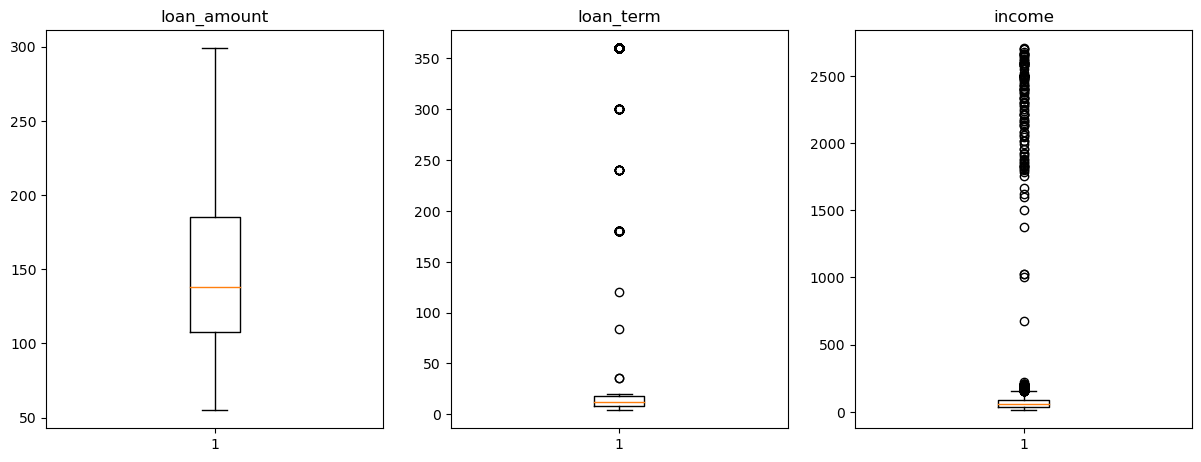

In [469]:
plt.figure(figsize=(20,30))
df_numerical = df6[['loan_amount', 'loan_term', 'income']]
for i in range(len(df_numerical.columns)):
    plt.subplot(5,4,i+1)
    plt.title(df_numerical.columns[i])
    plt.boxplot(df_numerical[df_numerical.columns[i]])
    
plt.show()

In [470]:
df6.describe()

,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Age,mortgage,dependents,education,self_employed,income,loan_status
count,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000
mean,149.177534,47.784300,589.909354,70.383548,48.272372,165.572647,54.225676,45.615296,52.988434,2.412607,0.378488,0.767431,103.963423,0.315744
std,56.485753,105.039918,168.159951,56.247192,36.022655,66.709845,25.924482,11.104395,97.094855,1.417503,0.485045,0.422293,285.008271,0.464845
min,55.000000,4.000000,300.000000,-1.000000,0.000000,29.000000,6.000000,23.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,108.000000,8.000000,448.000000,23.000000,20.000000,116.000000,35.000000,35.000000,0.000000,1.000000,0.000000,1.000000,39.000000,0.000000
50%,138.000000,12.000000,583.000000,62.000000,41.000000,155.000000,49.000000,46.000000,0.000000,2.000000,0.000000,1.000000,61.000000,0.000000
75%,185.000000,18.000000,729.000000,106.000000,71.000000,207.000000,70.000000,55.000000,90.000000,4.000000,1.000000,1.000000,86.000000,1.000000
max,299.000000,360.000000,900.000000,291.000000,194.000000,386.000000,146.000000,67.000000,635.000000,5.000000,1.000000,1.000000,2708.000000,1.000000


### Handling imbalance data

In [478]:
df6['loan_status'].value_counts(normalize=True)

loan_status
0    0.684256
1    0.315744
Name: proportion, dtype: float64

<Axes: xlabel='loan_status'>

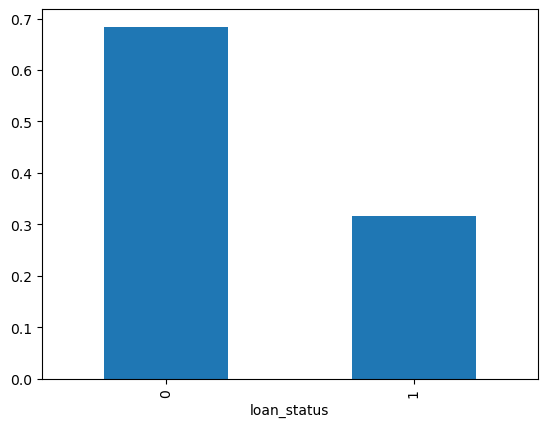

In [479]:
df6['loan_status'].value_counts(normalize=True).plot.bar()

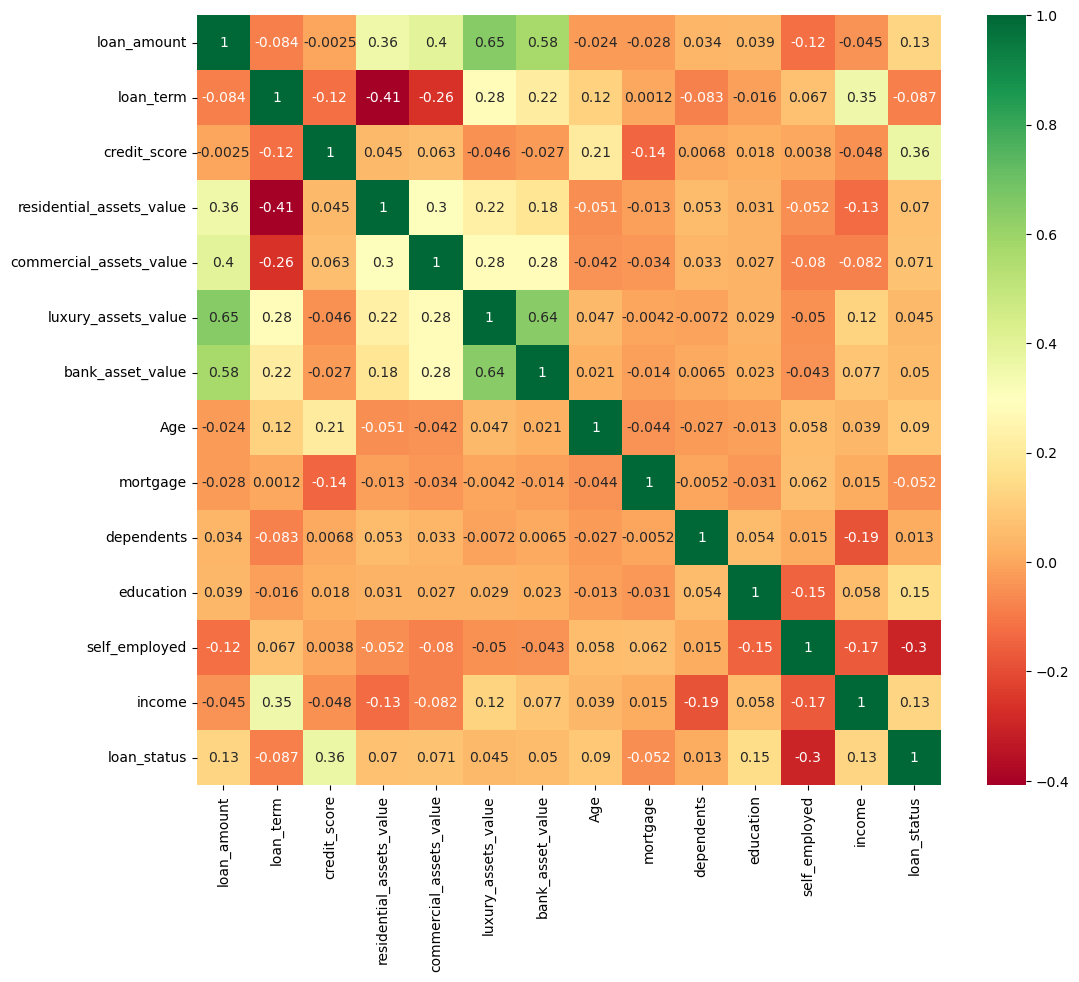

In [480]:
plt.figure(figsize=(12,10))
sns.heatmap(df6.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [482]:
df6_num = df6.select_dtypes(exclude=object)
target_name = 'loan_status'
df_numy1 = df6_num[df6_num[target_name]==1]
df_numy0 = df6_num[df6_num[target_name]==0]

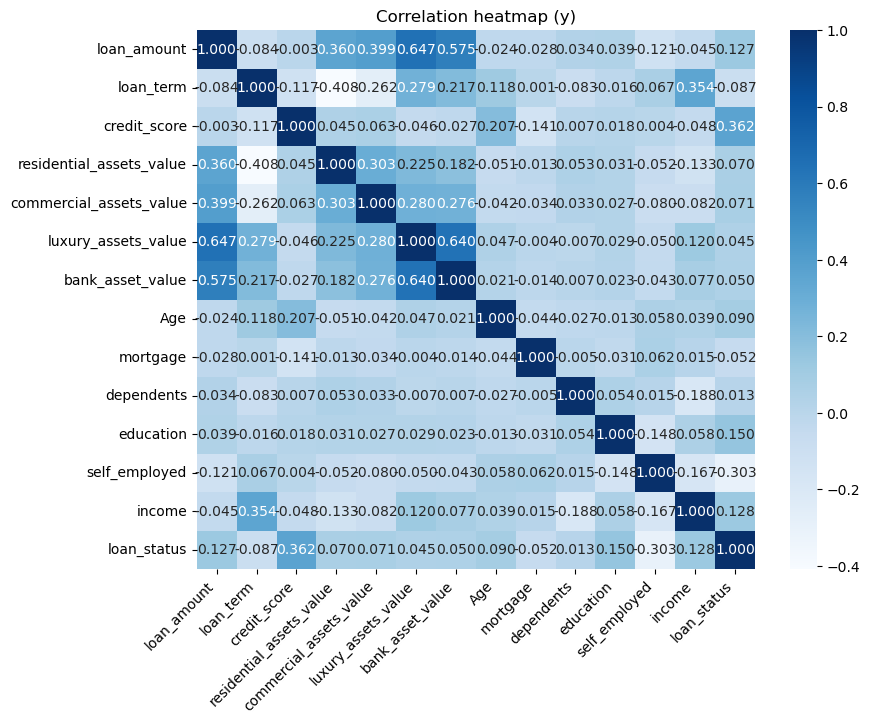

In [483]:
# y(all
plt.figure(figsize = (9,7))
g = sns.heatmap(df6_num.corr(), annot = True, cmap='Blues', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y)')
plt.show()

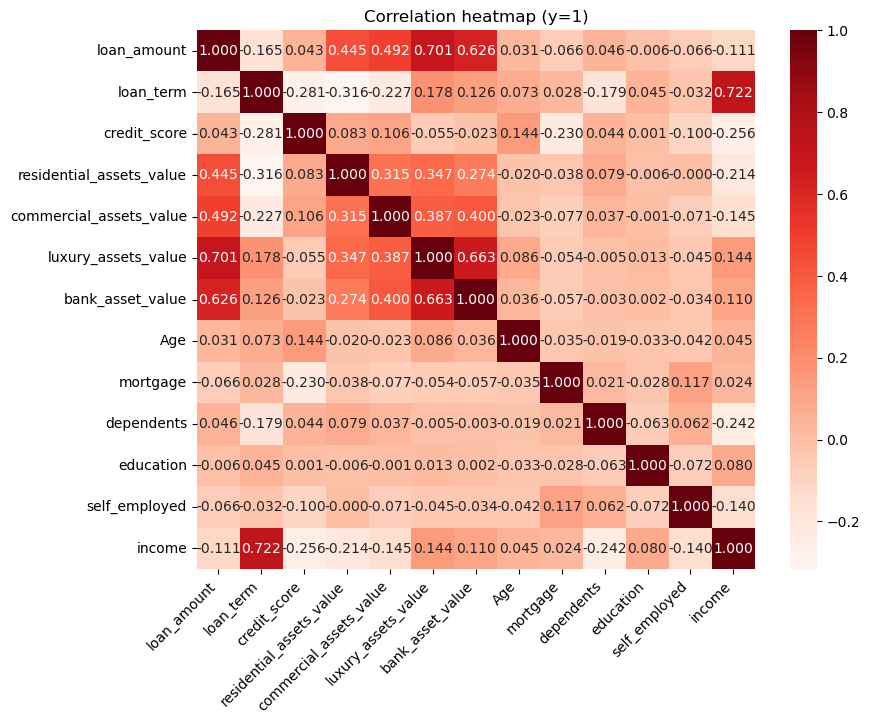

In [485]:
#  y=1
plt.figure(figsize = (9,7))
g = sns.heatmap(df_numy1.iloc[:,:-1].corr(), annot = True, cmap='Reds', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y=1)')
plt.show()

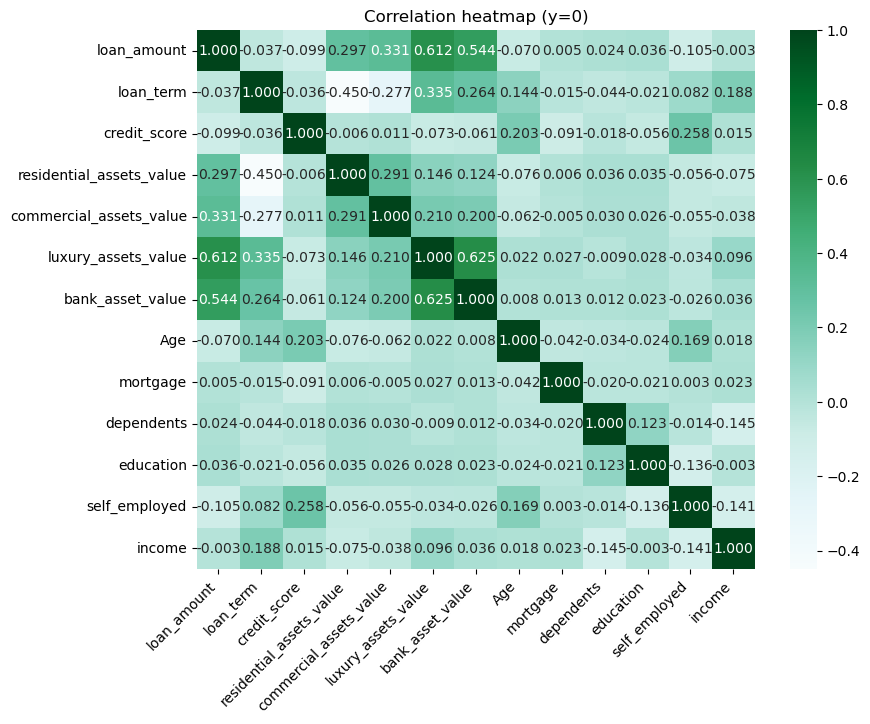

In [486]:
# y=0(n=410)
plt.figure(figsize = (9,7))
g=sns.heatmap(df_numy0.iloc[:,:-1].corr(), annot = True, cmap='BuGn', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y=0)')
plt.show()

### Splitting the data

In [487]:
from sklearn.model_selection import train_test_split

X = df6.drop(['loan_status'], axis=1)
y = df6['loan_status']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,stratify=df6['loan_status'])

### Decision tree

In [488]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}
DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)

In [489]:
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [490]:
DecisionTree_pred = DecisionTree.predict(X_test)

In [491]:
X.columns

Index(['loan_amount', 'loan_term', 'credit_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'Age', 'mortgage', 'dependents', 'education', 'self_employed',
       'income'],
      dtype='object')

In [492]:
columnX = ['loan_amount', 'loan_term', 'credit_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'Age', 'mortgage', 'dependents', 'education', 'self_employed',
       'income']
columnY = ['loan_status (1)', 'No loan_status (0)']

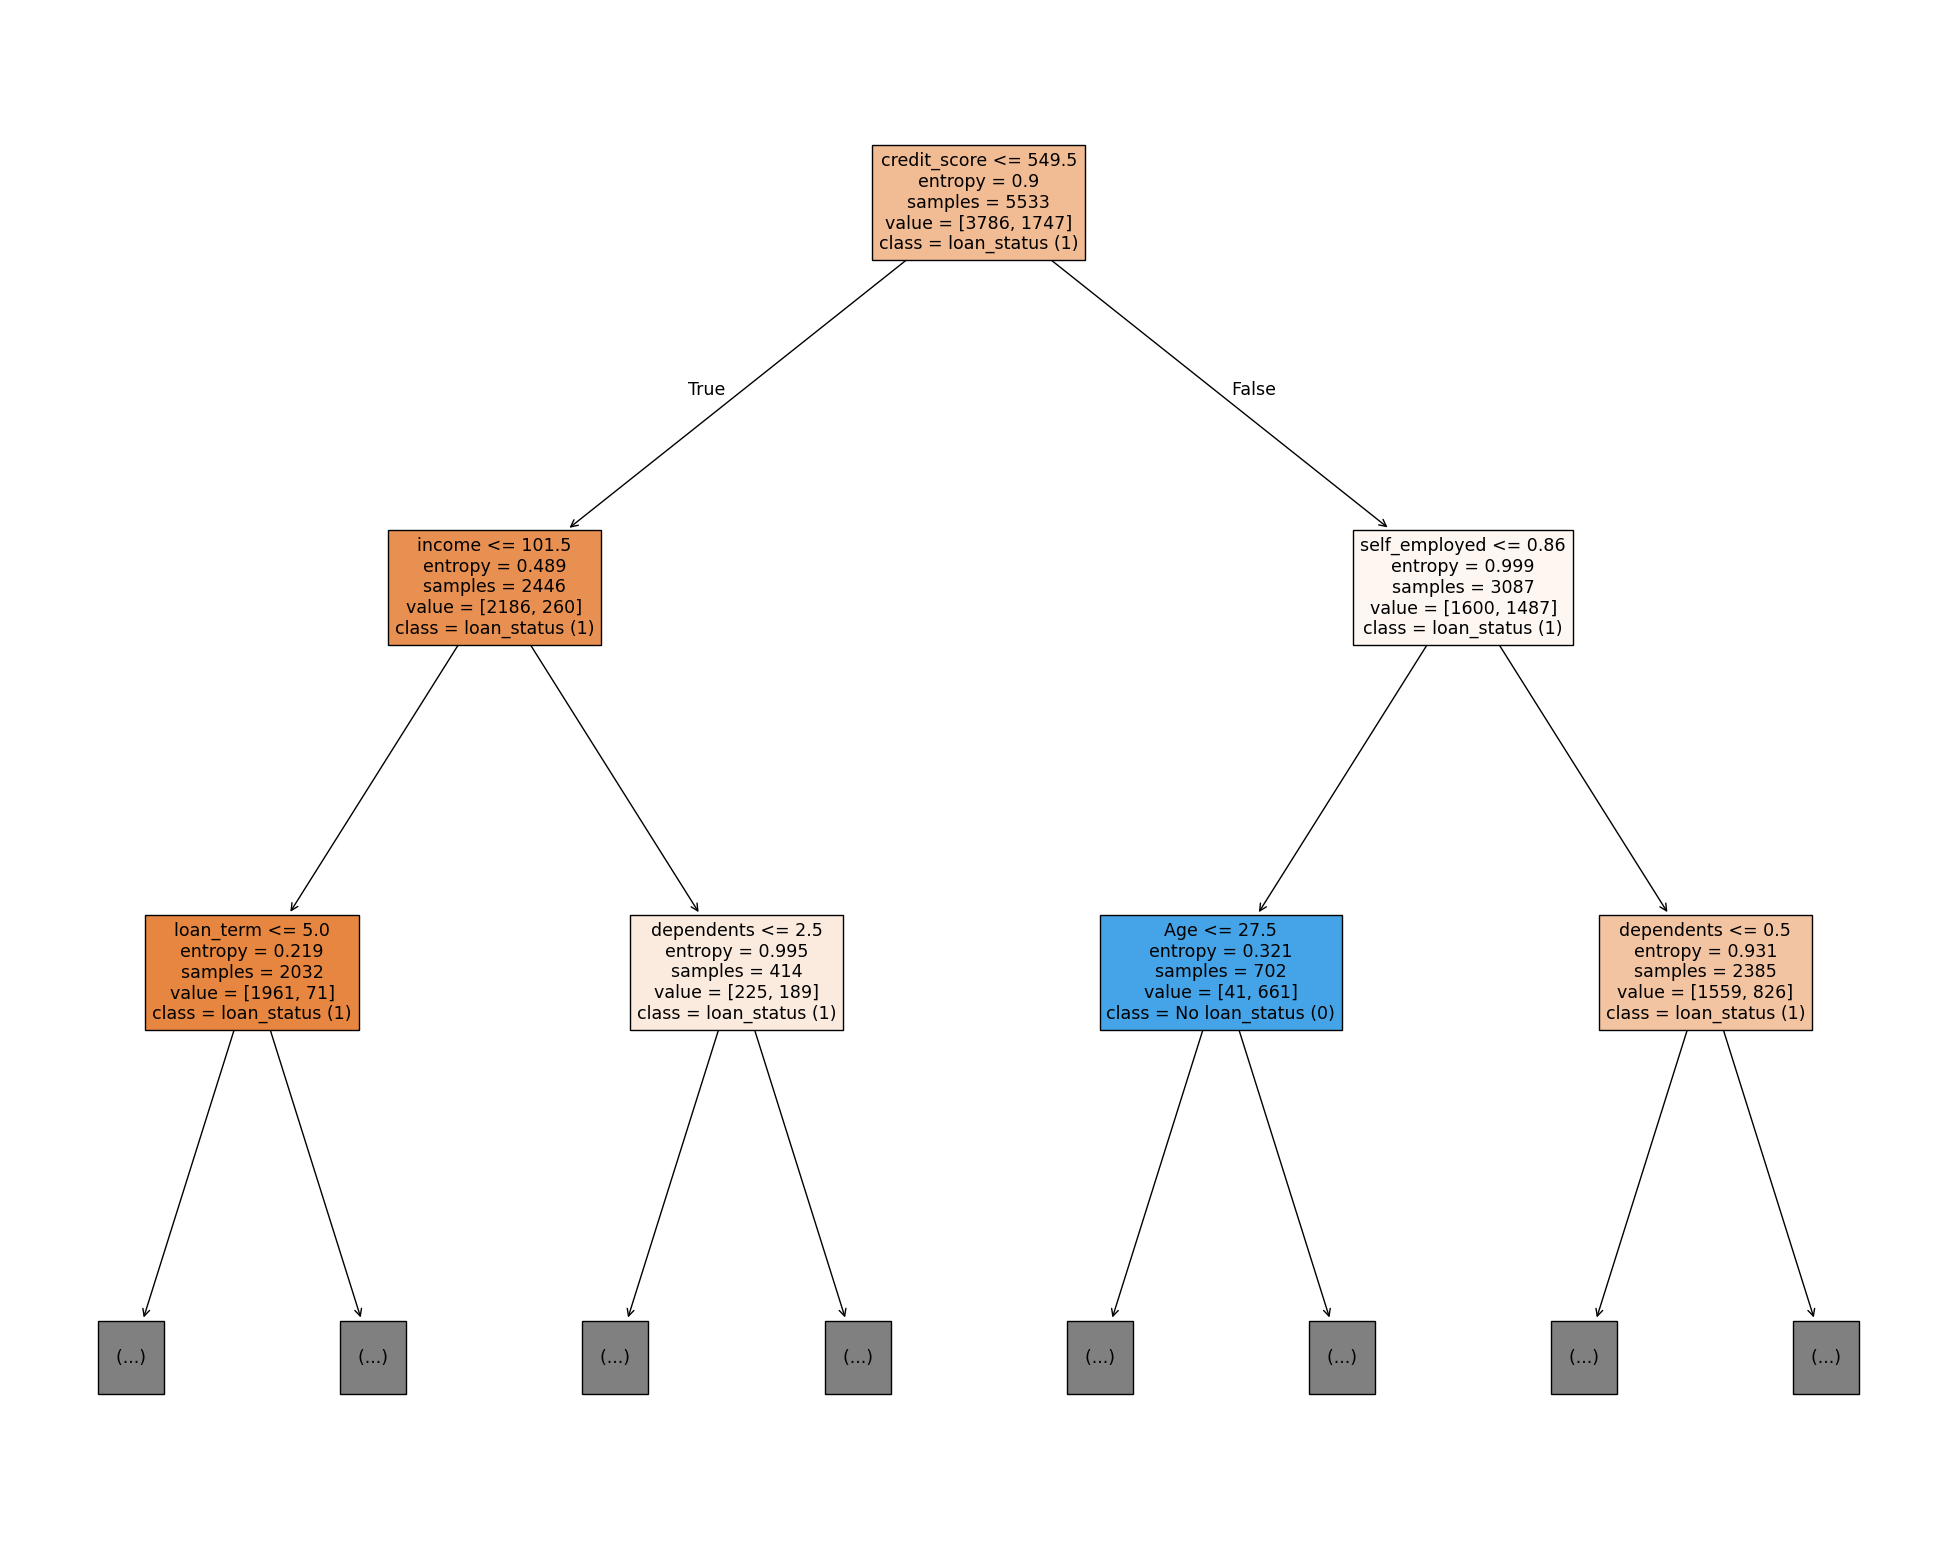

In [493]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DecisionTree, 
                   feature_names = columnX,
                   class_names = columnY,
                   max_depth = 2,
                   filled=True)

In [494]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay

train_score = DecisionTree.score(X_train, y_train)
test_score = DecisionTree.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9224652087475149
Test Score: 0.9002890173410405


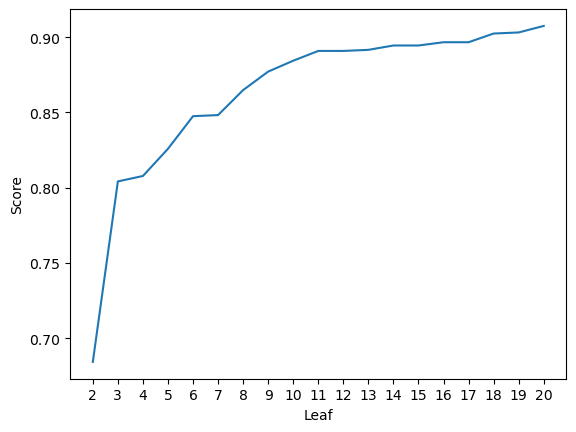

Decision Tree Accuracy: 90.75%


In [495]:
scoreListDT = []
for i in range(2,21):
    DT = DecisionTreeClassifier(max_leaf_nodes=i)
    DT.fit(X_train, y_train)
    scoreListDT.append(DT.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

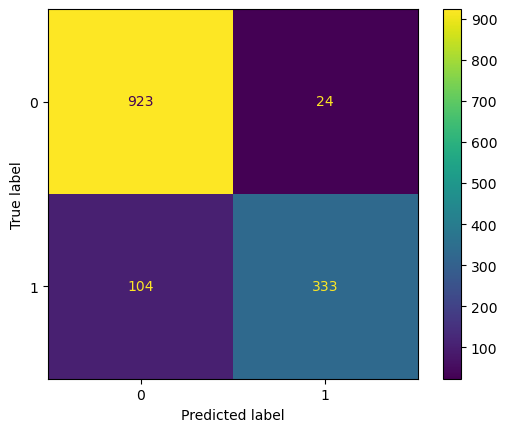

In [496]:
from sklearn.metrics import ConfusionMatrixDisplay
DT_pred = DT.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, DT_pred)

In [497]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, roc_auc_score, accuracy_score

print('weighted F1 score: ', f1_score(y_test, DT_pred, average = 'weighted'))
print('F1 score: ', f1_score(y_test, DT_pred))

fp_rate, tp_rate, thresholds = roc_curve(y_test, DT_pred)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, DT_pred, average = 'weighted'))

weighted F1 score:  0.9047293031921937
F1 score:  0.8387909319899244
auc score:  0.8683352704795826
roc_auc score:  0.8683352704795826


### Random forest

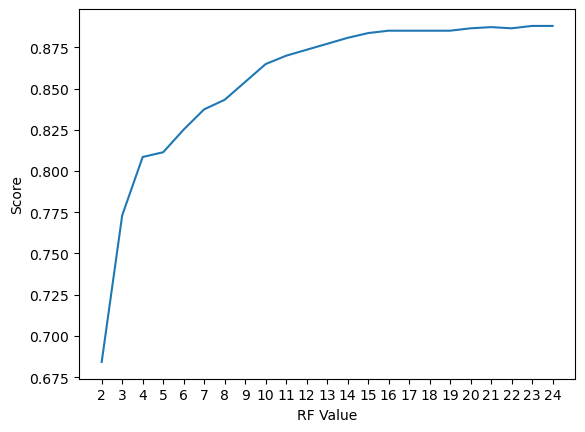

Random Forest Accuracy:  88.80%


In [498]:
from sklearn.ensemble import RandomForestClassifier

scoreListRF = []
for i in range(2,25):
    RF = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RF.fit(X_train, y_train)
    scoreListRF.append(RF.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

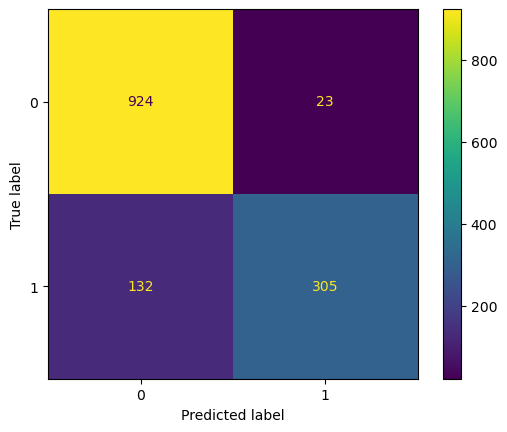

In [499]:
from sklearn.metrics import ConfusionMatrixDisplay
RF_pred = RF.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, RF_pred)

In [500]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, roc_auc_score, accuracy_score

print('weighted F1 score: ', f1_score(y_test, RF_pred, average = 'weighted'))
print('F1 score: ', f1_score(y_test, RF_pred))

fp_rate, tp_rate, thresholds = roc_curve(y_test, RF_pred)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, RF_pred, average = 'weighted'))

weighted F1 score:  0.8830743787601684
F1 score:  0.7973856209150327
auc score:  0.8368266403118122
roc_auc score:  0.8368266403118122


### Logistic Regression

In [501]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       947
           1       0.50      0.22      0.31       437

    accuracy                           0.68      1384
   macro avg       0.61      0.56      0.55      1384
weighted avg       0.65      0.68      0.64      1384

[[849  98]
 [340  97]]
LR accuracy: 68.35%


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


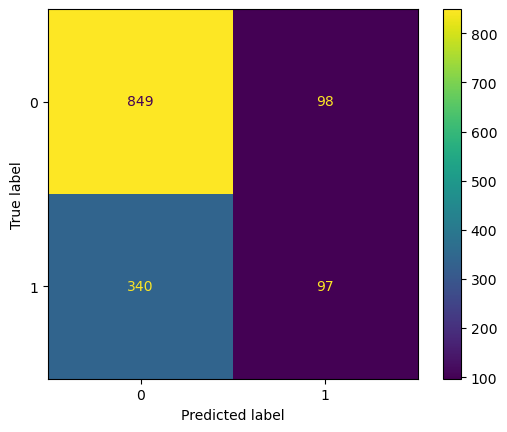

In [502]:
from sklearn.metrics import ConfusionMatrixDisplay
LR_pred = LR.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, LR_pred)

In [503]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, roc_auc_score, accuracy_score

print('weighted F1 score: ', f1_score(y_test,LR_pred, average = 'weighted'))
print('F1 score: ', f1_score(y_test, LR_pred))

fp_rate, tp_rate, thresholds = roc_curve(y_test, LR_pred)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, LR_pred, average = 'weighted'))

weighted F1 score:  0.6408628633064307
F1 score:  0.3069620253164557
auc score:  0.5592416374483797
roc_auc score:  0.5592416374483797


### K Nearest Neighbors

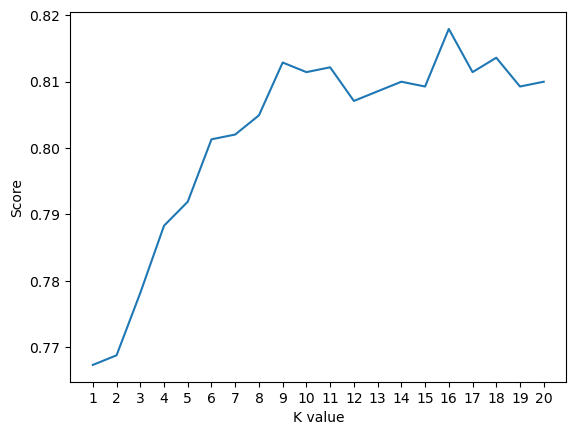

KNN best accuracy: 81.79%


In [504]:
from sklearn.neighbors import KNeighborsClassifier

scoreListknn = []
for i in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    scoreListknn.append(KNN.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

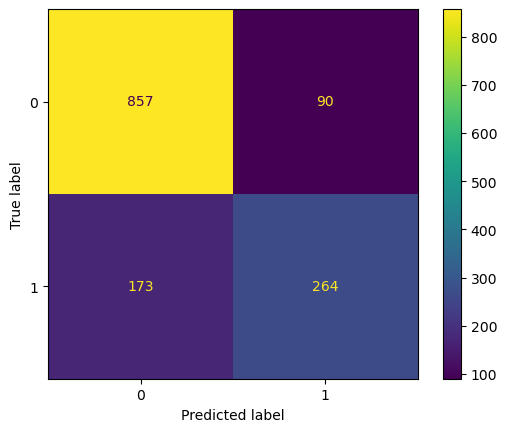

In [505]:
from sklearn.metrics import ConfusionMatrixDisplay
KNN_pred = KNN.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, KNN_pred)

In [506]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, roc_auc_score, accuracy_score

print('weighted F1 score: ', f1_score(y_test, KNN_pred, average = 'weighted'))
print('F1 score: ', f1_score(y_test, KNN_pred))

fp_rate, tp_rate, thresholds = roc_curve(y_test, KNN_pred)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, KNN_pred, average = 'weighted'))

weighted F1 score:  0.8039901603915605
F1 score:  0.6675094816687737
auc score:  0.7545410171588468
roc_auc score:  0.7545410171588468
